# EDA

In [2]:
# Import libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
import regex as re
from nltk.corpus import stopwords
from sklearn.feature_extraction import text 

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

### 1. Read in clean reddit data from pickle

In [3]:
# read in data from my pickle
reddit = pickle.load(open("../assets/reddit.pkl", "rb"))

In [4]:
# remove duplicates
reddit.drop_duplicates(inplace=True)
reddit.reset_index(drop=True, inplace=True)

### 2. Familiarize with common words in each data set

This was an iterative process:

1. Look at the most common words in my dataset
2. Determine which ones should be considered as stop words
3. Add to my list of stop words
4. Repeat until I get common words that have actual meaning

In [21]:
# from the eda, remove popular wards that are not that significant
common_words = ["feel", "like", "just", "im", "know", "tl", "dr", "tldr", "amp", "nbsp", "really",
               "mom", "mum", "parent", "nparent", "nmom", "dad", "father", "brother", "ex", "nex", 
                "sister", "ns", "mother", "becaus", "because"]

# remove time stop words
time_words = ["time", "today", "tomorrow", "yesterday", 
             "morning", "afternoon", "night",
             "day", "week", "weekend", "month", "year",
              "days", "weeks", "weekends", "months", "years",
             "monday", "tuesday", "wednesday", "thursday", "friday", "satudray", "sunday",
             "mon", "tues", "wed", "thurs", "fri", "sat", "sun"
             "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december",
             "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
            ]


# add the lists together
additional_stop_words = common_words + time_words

### Start with common words

In [6]:
# create a count vectorizer for singular words
cvec1 = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(additional_stop_words),  # add my custom stop words to default 'english'
                       min_df=5, 
                       ngram_range=(1,1),
                       max_df=1.0)

In [7]:
# fit and transform my data to count vectorizer
term_mat1 = cvec1.fit_transform(reddit['title_selftext'])

In [8]:
# create a dataframe of my terms
term_df1 = pd.DataFrame(term_mat1.toarray(), columns=cvec1.get_feature_names())

In [9]:
# create a boolean of my class column
# 1 == 'raisedbynarcissists'
# 0 == "lifeafternarcissism"

sub = np.where(reddit["subreddit"] == "raisedbynarcissists", 1,0)

In [10]:
# insert my class column into term dataframe
term_df1.insert(0, 'subreddit_target', sub)

In [11]:
# create a dataframe of the top 30 words in each subreddit
top_words = term_df1.groupby('subreddit_target').mean().T.sort_values(0, ascending=False).head(30)

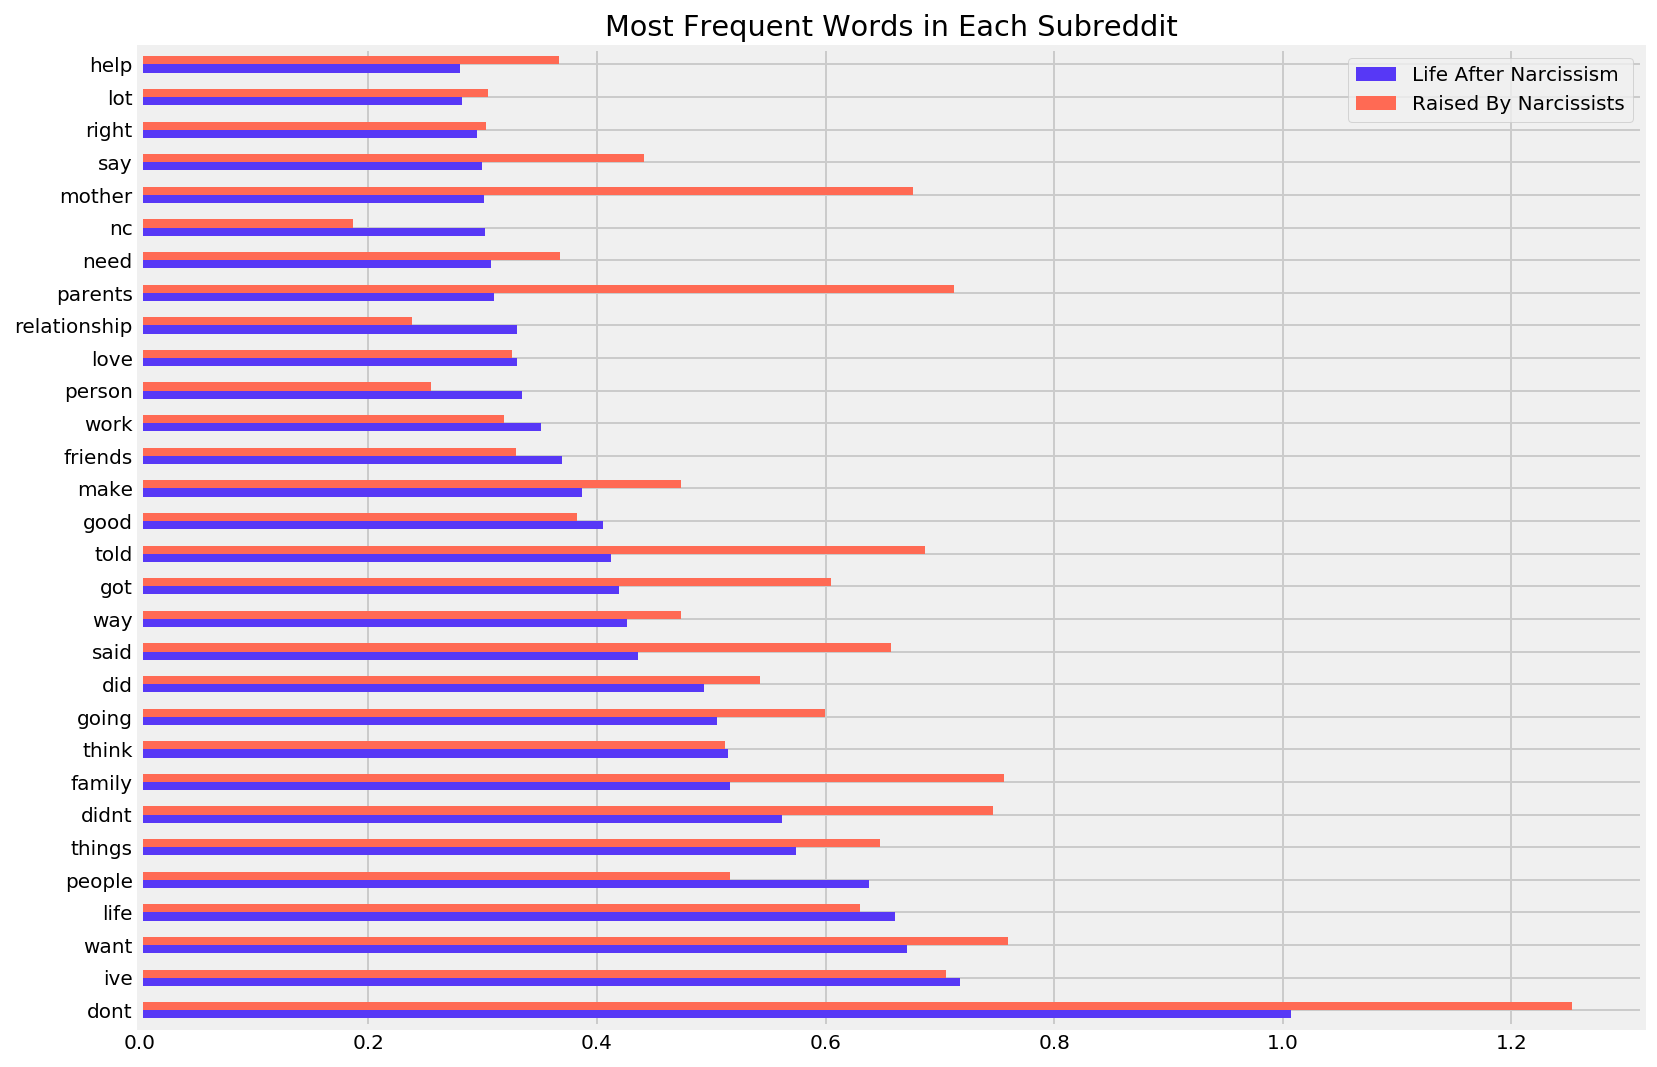

In [12]:
# Visualize the top words between each subreddit
top_words.plot(y=[0, 1], kind="barh", color = ["#5738f6", "#ff6a54"], figsize= (12,9))
plt.title("Most Frequent Words in Each Subreddit")
plt.legend(labels=["Life After Narcissism", "Raised By Narcissists"])
plt.savefig("../plots/top_words.png");

"nc" in this context means "no contact." It's interesting that LifeAfterNarcissism has more "nc" posts than raisedbynarcissists.

### Visualize the most common bigrams

In [13]:
# tokenize my words
cvec = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(additional_stop_words), # adds my custom list of stop words to the default english one 
                       min_df=5, 
                       ngram_range=(2,3), # select for bigrams
                       max_df=1.0)

In [14]:
# fit and transform my data into the countvectorizer
term_mat = cvec.fit_transform(reddit['title_selftext'])

In [15]:
# create into dataframe
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

In [16]:
# insert my class column into my term dataframe
term_df.insert(0, 'subreddit_target', sub)

In [25]:
# sort for the top 30 bigrams
top_bigrams = term_df.groupby('subreddit_target').mean().T.sort_values(0, ascending=False).head(10)

In [11]:
top_bigrams = pickle.load(open("../assets/top_bigrams.pkl", "rb"))

In [17]:
top_bigrams= top_bigrams.head(15)

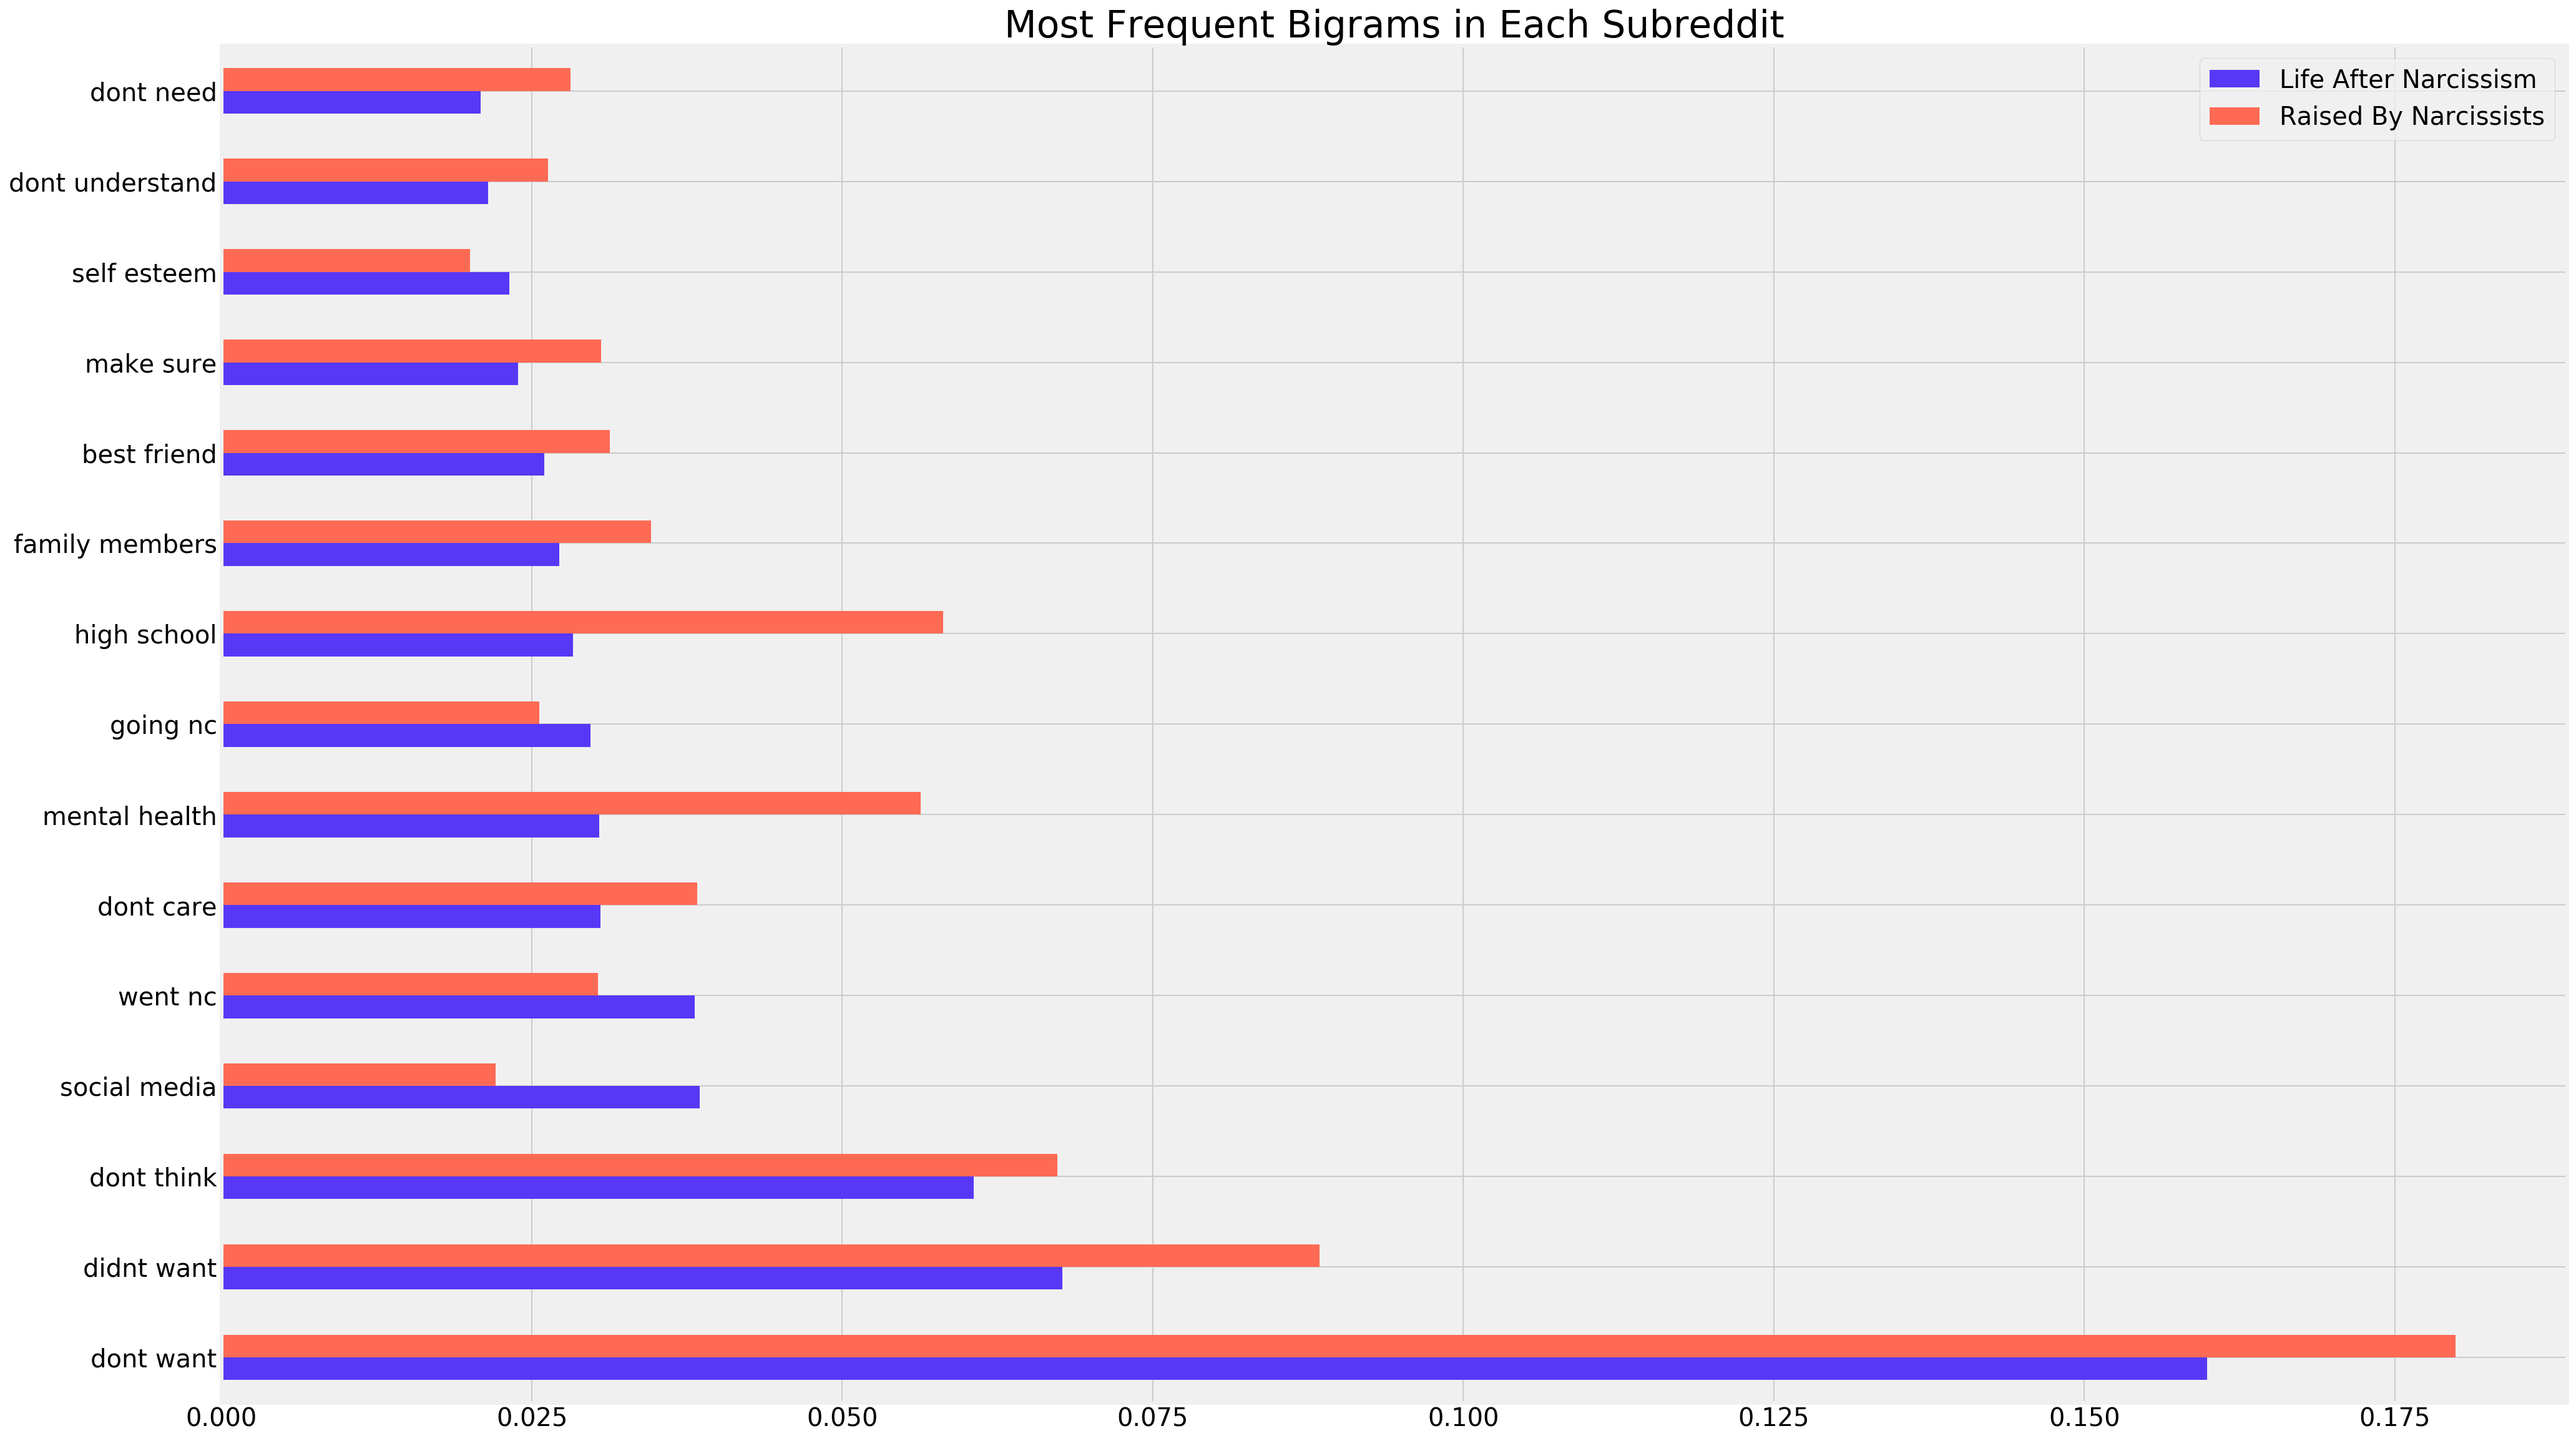

In [20]:
# Visualize the top words between each subreddit
top_bigrams.plot(y=[0, 1], kind="barh", color = ["#5738f6", "#ff6a54"], figsize= (30,20), fontsize=20)
plt.title("Most Frequent Bigrams in Each Subreddit", fontsize=30)
plt.legend(labels=["Life After Narcissism", "Raised By Narcissists"], fontsize =20)
plt.savefig("../plots/top_bigrams.png");

# Pickle for later use

In [13]:
pickle.dump(top_words, open("../assets/top_words.pkl", "wb"))

In [65]:
pickle.dump(top_bigrams, open("../assets/top_bigrams.pkl", "wb"))

In [22]:
pickle.dump(additional_stop_words, open("../assets/additional_stop_words.pkl", "wb"))